# Decision Tree (Árvore de Decisão)

Determinar se após um telefonema de um banco de Portugual, o cliente fará um depósito na conta baseado em seu histórico pessoal, hitórico no banco e  tentativa de contato anteriores.

Dataset obtido no Kaggle (https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset)

Importanto bibliotecas usuais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('bank-additional-full.csv')

In [3]:
dados.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [4]:
dados = pd.read_csv('bank-additional-full.csv',sep=';')

In [5]:
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age -> idade (variável numérica)

job -> emprego (variável categórica) 

marital -> estado civíl (variável categórica)

education -> nível de educação (variável categórica)

default -> já tem crédito? (variável categórica)

housing -> tem hipoteca? (variável categórica)

loan -> empréstimo pessoal? (variável categórica)

contact -> tipo de contato (variável categórica)

month -> mês do último contato (variável categórica)

day_of_week -> dia da semana da tentativa de contato (variável categórica)

duration -> duração da última chamada (variável numérica)

campaign -> número de ligações para o cliente (variável numérica)

pdays -> intervalo entre as duas últimas ligações (variável numérica)
 
previous -> número de ligações antes desta campanha (variável numérica)

poutcome -> resultado da última campanha (variável categórica)

emp.var.rate -> taxa da variaçào de emprego (variável numérica)

cons.price.idx -> indice de preço do consumidor (variável numérica)

cons.conf.idx -> indice de confiança do consumidor (variável numérica)

euribor3m -> indicador diário (variável numérica)

nr.employed -> número de funcionários (variável numérica)

y -> resultado (variável categórica)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Text(0, 0.5, 'Número de clientes')

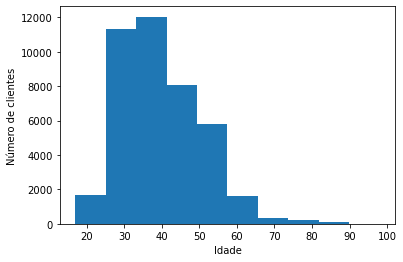

In [7]:
dados['age'].plot(kind='hist')
plt.xlabel('Idade')
plt.ylabel('Número de clientes')

Observamos da distribuição que maioria dos clientes estão na faixa entre 30 e 50 anos

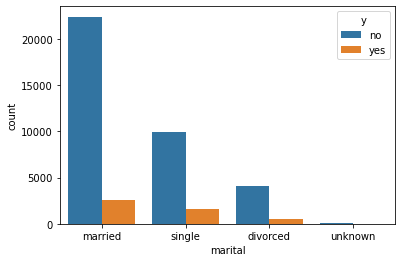

In [8]:
sns.countplot(x='marital',data=dados,hue='y')

Os clientes mais procurados são casados. Normalmente são pessoas mais organizadas financeiramente e tem a renda somada do marido e mulher

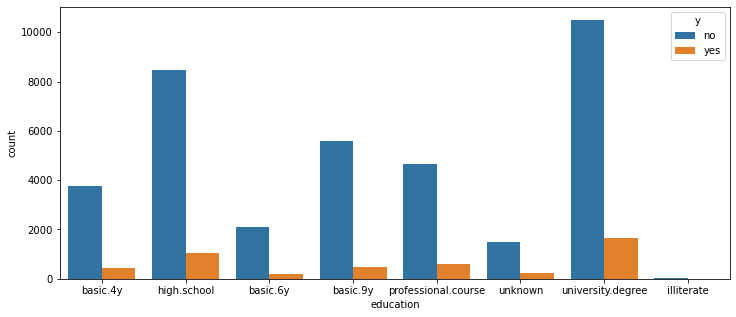

In [9]:
plt.figure(figsize = (12,5))
sns.countplot(x='education',data=dados,hue='y')

Clientes mais procurados tem ensino médio completo ou superior completo. Isto está relacionado com terem maior renda e maior possibilidade de pagarem as contas em dia

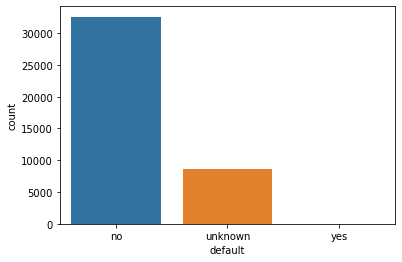

In [10]:
sns.countplot(x='default',data=dados)

Clientes que não tem empréstimo no momento devem ser mais procurados por estarem em melhor condição financeira

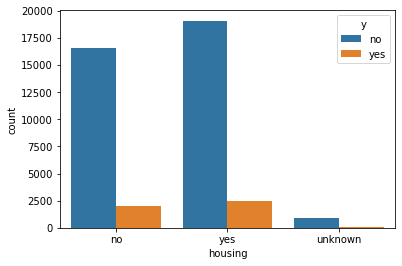

In [11]:
sns.countplot(x='housing',data=dados,hue='y')

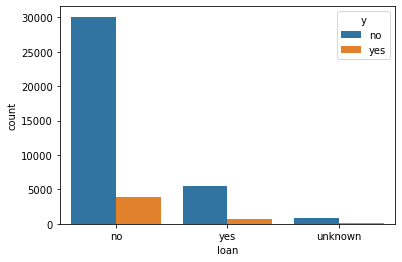

In [12]:
sns.countplot(x='loan',data=dados,hue='y')

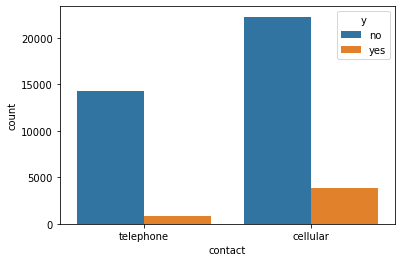

In [13]:
sns.countplot(x='contact',data=dados,hue='y')

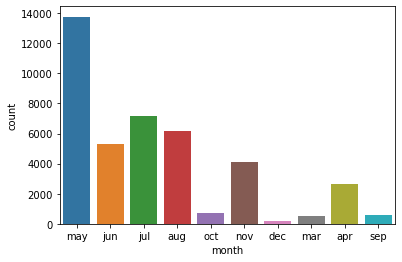

In [14]:
sns.countplot(x='month',data=dados)

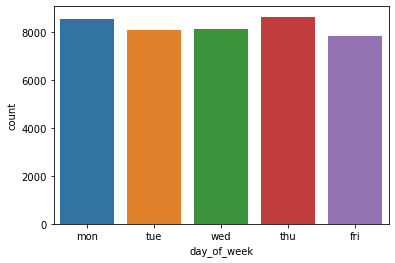

In [15]:
sns.countplot(x='day_of_week',data=dados)

Text(0, 0.5, 'Número de clientes')

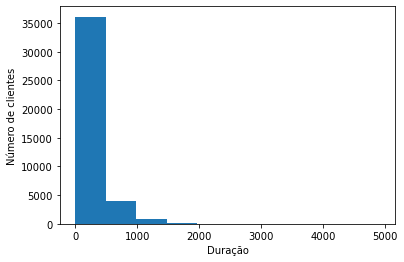

In [16]:
dados['duration'].plot(kind='hist')
plt.xlabel('Duração')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

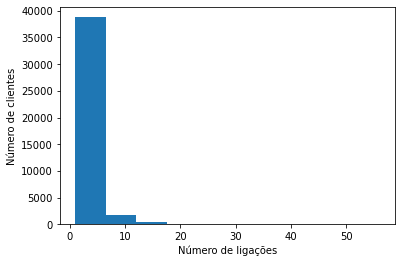

In [17]:
dados['campaign'].plot(kind='hist')
plt.xlabel('Número de ligações')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

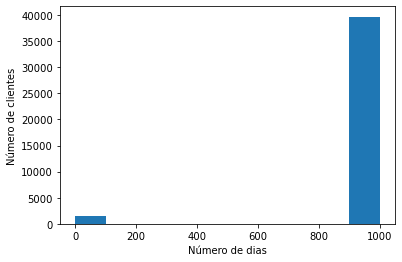

In [18]:
dados['pdays'].plot(kind='hist')
plt.xlabel('Número de dias')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

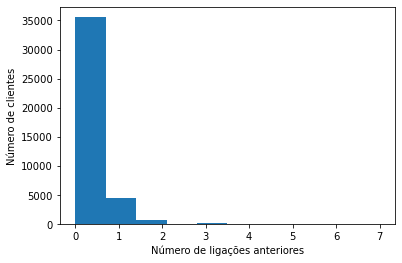

In [19]:
dados['previous'].plot(kind='hist')
plt.xlabel('Número de ligações anteriores')
plt.ylabel('Número de clientes')

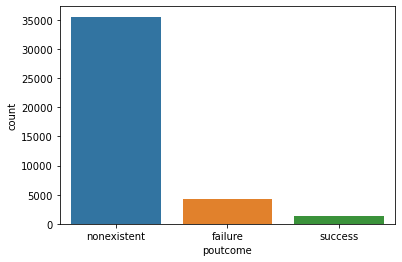

In [20]:
sns.countplot(x='poutcome',data=dados)

Text(0, 0.5, 'Número de clientes')

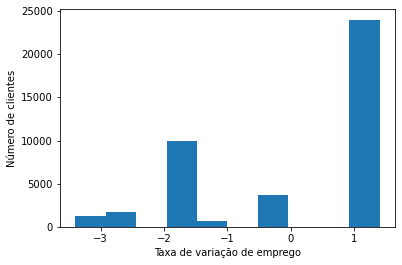

In [21]:
dados['emp.var.rate'].plot(kind='hist')
plt.xlabel('Taxa de variação de emprego')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

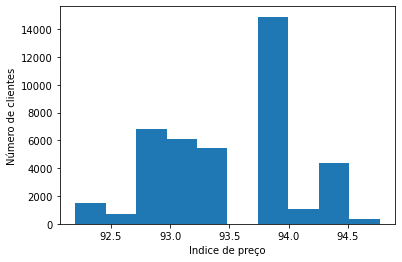

In [22]:
dados['cons.price.idx'].plot(kind='hist')
plt.xlabel('Indice de preço')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

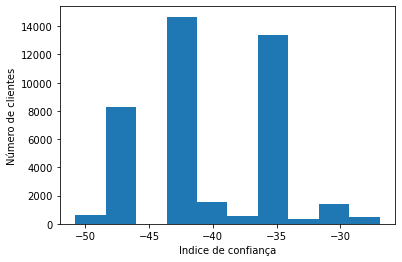

In [23]:
dados['cons.conf.idx'].plot(kind='hist')
plt.xlabel('Indice de confiança')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

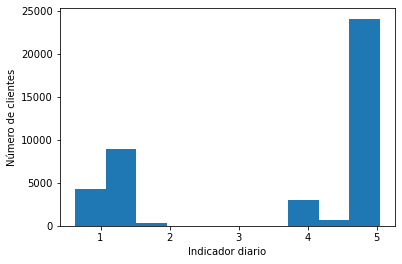

In [24]:
dados['euribor3m'].plot(kind='hist')
plt.xlabel('Indicador diario')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de clientes')

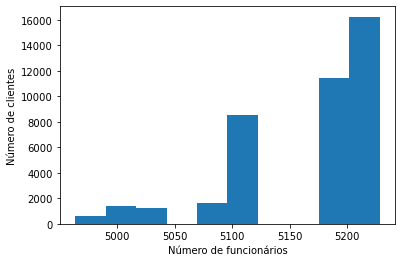

In [25]:
dados['nr.employed'].plot(kind='hist')
plt.xlabel('Número de funcionários')
plt.ylabel('Número de clientes')

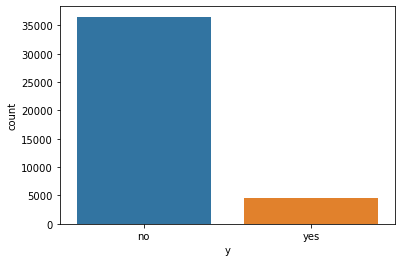

In [26]:
sns.countplot(x='y',data=dados)

Observamos que a amostra não está balanceada e isto poderá fazer com que o modelo falhe para os casos que aceitaram a proposto. Caso isso se confirme, iremos utilizar uma amostra aleatória de clientes que recusaram com o mesmo tamanho do número de clientes que aceitaram

Devido o número de ligações durante a semana estar balanceado, podemos remover esta informação

In [27]:
dados = dados.drop('day_of_week',axis=1)

Convertendo variáveis catgóricas em variáveis numéricas

Convertendo utilizando dicionário

In [28]:
dados['y'] = dados['y'].map({'yes' : 1, 'no' : 0})

In [29]:
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Convertendo utilizando o LabelEnconder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
enconder = LabelEncoder()

In [32]:
dados['job'] = enconder.fit_transform(dados['job'])
dados['marital'] = enconder.fit_transform(dados['marital'])
dados['education'] = enconder.fit_transform(dados['education'])
dados['default'] = enconder.fit_transform(dados['default'])
dados['housing'] = enconder.fit_transform(dados['housing'])
dados['loan'] = enconder.fit_transform(dados['loan'])
dados['contact'] = enconder.fit_transform(dados['contact'])
dados['month'] = enconder.fit_transform(dados['month'])
dados['poutcome'] = enconder.fit_transform(dados['poutcome'])

In [33]:
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Algumas colunas numéricas os dados apresentam uma variação muito grande. Isto pode afetar a eficiência do modelo e por esta razão serão normalizados

In [34]:
colunas = ['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [35]:
print(dados['cons.price.idx'].min())
print(dados['cons.price.idx'].max())

92.20100000000001
94.76700000000001


In [36]:
print(dados['cons.conf.idx'].min())
print(dados['cons.conf.idx'].max())

-50.8
-26.9


In [37]:
print(dados['euribor3m'].min())
print(dados['euribor3m'].max())

0.634
5.045


In [38]:
print(dados['nr.employed'].min())
print(dados['nr.employed'].max())

4963.6
5228.1


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()

In [41]:
dados[colunas] = sc.fit_transform(dados[colunas])

In [42]:
dados.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,0.010471,1,0.195414,0,1,1.1,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,-0.421501,1,0.195414,0,1,1.1,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,-0.124520,1,0.195414,0,1,1.1,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,-0.413787,1,0.195414,0,1,1.1,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,0.187888,1,0.195414,0,1,1.1,0.722722,0.886447,0.71246,0.33168,0


Verificando a correlação dos dados

In [43]:
correlacao = dados.corr()

Text(0.5, 1.0, 'Mapa de calor dos coeficientes de correlação')

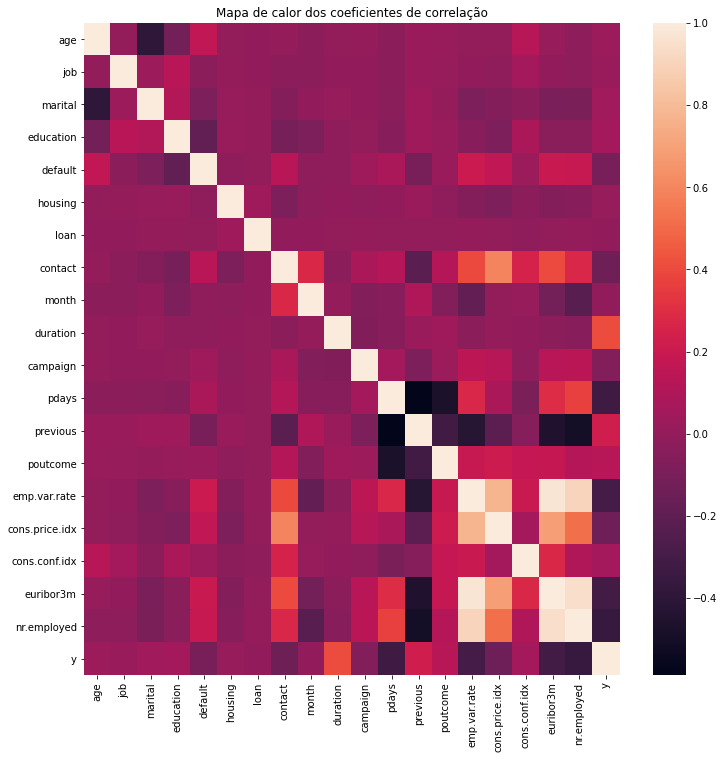

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(correlacao)
plt.title('Mapa de calor dos coeficientes de correlação')

Separando as variaveis em X e Y

In [45]:
X = dados.drop('y',axis=1).values
Y = dados['y'].values

Separando em amostras de treino e teste

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando o modelo da arvore de decisão

In [82]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [49]:
dte = DecisionTreeClassifier()

In [50]:
dte.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

Realizando ajuste do modelo

In [51]:
dte.fit(X_treino,Y_treino)

DecisionTreeClassifier()

Determinando acurácia na amostra de treino

In [52]:
score_treino = dte.score(X_treino,Y_treino)

In [53]:
score_treino

1.0

Realizando previsão na amostra de teste

In [54]:
Y_previsto = dte.predict(X_teste)

In [55]:
score_teste = dte.score(X_teste,Y_teste)

In [56]:
score_teste

0.8933670000971157

Gerando matriz de confusão para comparar os resultados

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [59]:
cm

array([[8570,  569],
       [ 529,  629]])

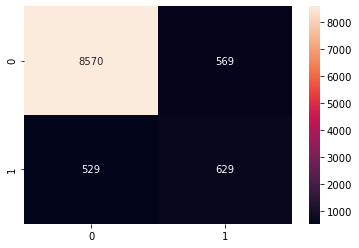

In [60]:
sns.heatmap(cm,annot=True, fmt="d")

In [61]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [62]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9139
           1       0.53      0.54      0.53      1158

    accuracy                           0.89     10297
   macro avg       0.73      0.74      0.74     10297
weighted avg       0.89      0.89      0.89     10297



F1-score

In [63]:
f1 = f1_score(Y_teste,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 53.40%


Precision score

In [64]:
precisao = precision_score(Y_teste,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 52.50%


Average precision score

In [65]:
avg_precision = average_precision_score(Y_teste,Y_previsto)
print("Averaged Precision score = {:0.2f}%".format(avg_precision*100))

Averaged Precision score = 33.66%


Recall score

In [66]:
rec = recall_score(Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 54.32%


Accuracy score

In [67]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 89.34%


# Curva ROC

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(roc_score*100))

ROC score = 74.05%


In [70]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

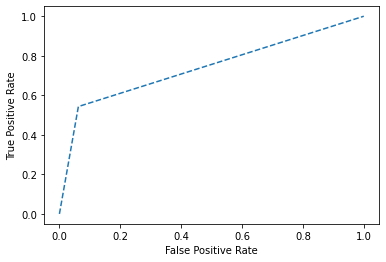

In [71]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Curva Precision-Recall

In [72]:
from sklearn.metrics import precision_recall_curve,auc

In [73]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_teste, Y_previsto)
lr_auc = auc(lr_recall, lr_precision)

In [74]:
print("AUC score = {:0.2f}%".format(lr_auc*100))

AUC score = 55.98%


Text(0, 0.5, 'Precision')

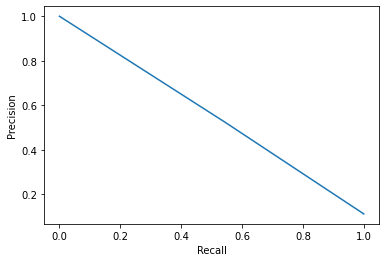

In [75]:
plt.plot(lr_recall, lr_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

# Gerando imagem da árvore

[Text(261.6247336416642, 1604.4967741935484, 'node #0\nX[18] <= -1.099\ngini = 0.2\nsamples = 30891\nvalue = [27409, 3482]'),
 Text(67.39812789724205, 1551.890322580645, 'node #1\nX[9] <= -0.385\ngini = 0.493\nsamples = 3767\nvalue = [2103, 1664]'),
 Text(15.530292562039367, 1499.283870967742, 'node #2\nX[11] <= -5.072\ngini = 0.254\nsamples = 1314\nvalue = [1118, 196]'),
 Text(6.854234908750586, 1446.6774193548388, 'node #3\nX[10] <= 3.5\ngini = 0.461\nsamples = 197\nvalue = [126, 71]'),
 Text(6.54089845577913, 1394.0709677419354, 'node #4\nX[17] <= -1.675\ngini = 0.479\nsamples = 179\nvalue = [108, 71]'),
 Text(2.9766963032288256, 1341.4645161290323, 'node #5\nX[17] <= -1.677\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(2.350023397285915, 1288.858064516129, 'node #6\nX[0] <= 1.821\ngini = 0.49\nsamples = 28\nvalue = [16, 12]'),
 Text(2.03668694431446, 1236.2516129032258, 'node #7\nX[3] <= 6.5\ngini = 0.444\nsamples = 24\nvalue = [16, 8]'),
 Text(1.2533458118858214, 1183.6451

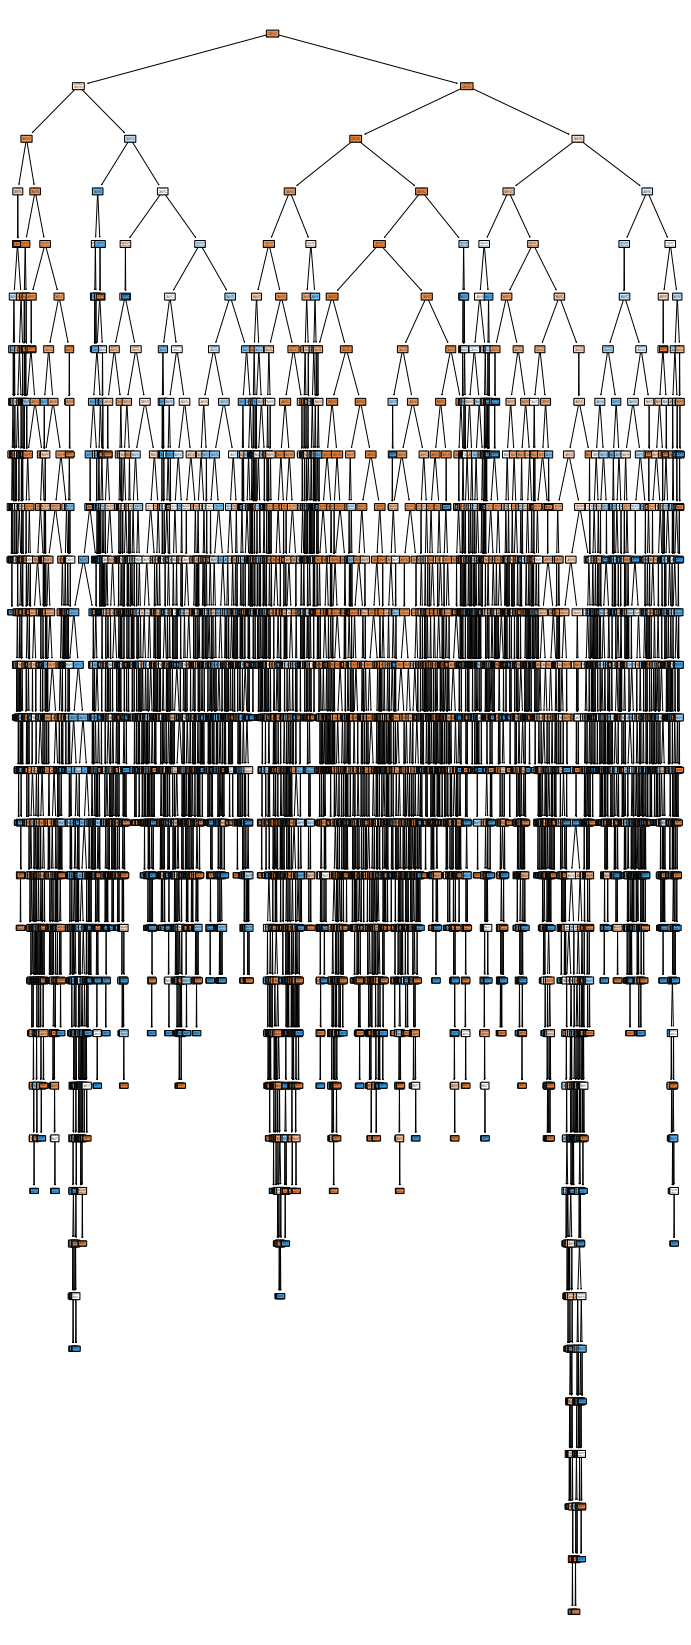

In [85]:
plt.figure(figsize=(12,30))
plot_tree(dte,filled=True,node_ids=True,rounded=True);